In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
# 공원과 학교간의 거리를 측정하기 위한 함수 생성
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # 지구 반지름을 이용한 거리 계산     
    # 경위도 라디안으로 변경
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a)) 
    distance = 6371 * c # Radius of earth in kilometers
    return distance

def nearest_park_distance(target_lat, target_lon, park_df):
    distances = park_df.apply(lambda row: haversine_distance(target_lat, target_lon, row['위도'], row['경도']), axis=1)
    return distances.min()

    

In [96]:
n_df = pd.read_csv('시설 정보 현황.csv',encoding='cp949')

In [97]:
# 법령에 근거해서 도시숲, 수변공원, 체육시설의 위치와 target간의 거리 확인
f_df = n_df[n_df['유형'] == '도시숲']
g_df = n_df[n_df['유형'] == '체육시설']

In [98]:
f_d_list =[]
for idx, row in target_df.iterrows():
    target_lon = row['X']
    target_lat = row['Y']
    d =nearest_park_distance(target_lat, target_lon, f_df)
    f_d_list.append(d)

In [99]:
g_d_list =[]
for idx, row in target_df.iterrows():
    target_lon = row['X']
    target_lat = row['Y']
    d =nearest_park_distance(target_lat, target_lon, g_df)
    g_d_list.append(d)

In [100]:
df = pd.DataFrame({'숲' : f_d_list,'체육시설': g_d_list})

In [101]:
df

,숲,체육시설
0,5.004195,2.299006
1,4.191644,1.336364
2,9.682428,1.329928
3,1.219642,1.644739
4,6.692226,3.309064
5,0.485712,0.817816
6,3.470217,2.381791
7,0.253123,0.337139
8,0.218671,0.276865
9,0.664141,0.760650


In [102]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [103]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

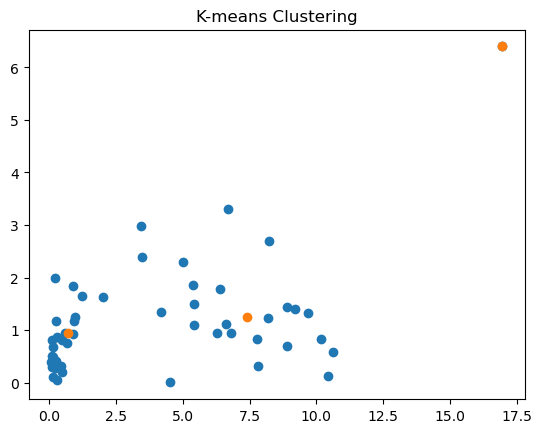

In [104]:
plt.scatter(df.values[:, 0], df.values[:, 1])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1])
plt.title("K-means Clustering")
plt.show()

In [105]:
assignments_X_train = kmeans.labels_
print(assignments_X_train)

[2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2]


In [106]:
idx = []
for i in range(len(assignments_X_train)):
    if assignments_X_train[i] == 0 :
        idx.append(i)
print(idx)

[26]


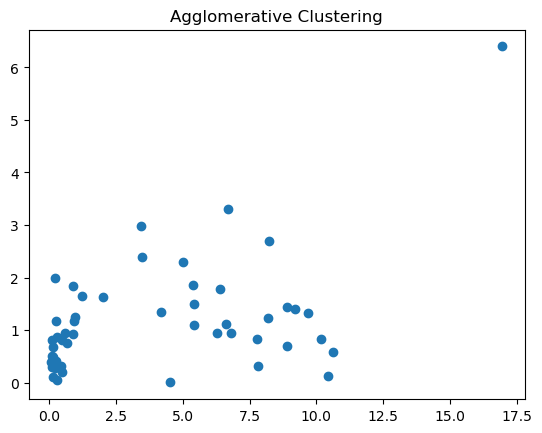

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering 객체 생성
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

# 군집화 수행
clusters = agg_cluster.fit_predict(df)

# 결과 시각화
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

